In [19]:
#Basic libraries
import pandas as pd
import numpy as np

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline

#Misc libraries
import warnings
warnings.filterwarnings("ignore")

In [23]:
#   Chargement des données

df = pd.read_csv(r"C:\Users\user\Desktop\Fraud_detection_project\data\transactions.csv", sep=",")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [21]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# Voyons si les données comportent des valeurs manquantes
df.isna().sum() 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [26]:
#Pivot table
paysim_pivot1=pd.pivot_table(df,index=["type"],
                               values=['amount','isFraud','isFlaggedFraud'],
                               aggfunc=[np.sum,np.std], margins=True)

#Adding color gradient 
cm = sns.light_palette("green", as_cmap=True)
paysim_pivot1.style.background_gradient(cmap=cm)

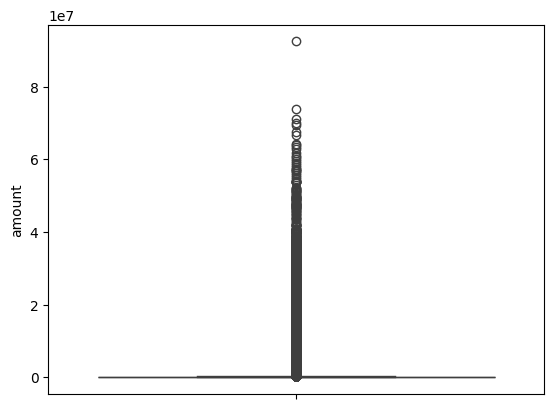

In [31]:
#Distribution of Amount
fig = sns.boxplot(df, y="amount")
plt.show()

##### Nous ne constatons aucune valeurs manquantes ce qui est déjà bien pour la suite de notre travail 

type
CASH_OUT    0.351663
PAYMENT     0.338146
CASH_IN     0.219923
TRANSFER    0.083756
DEBIT       0.006512
Name: proportion, dtype: float64


<Axes: title={'center': 'Répartition des types de transactions'}, xlabel='type'>

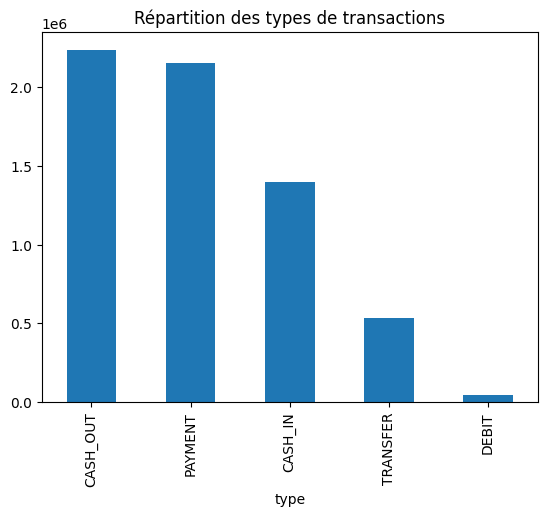

In [32]:
# Vérifions la répartion des types de transactions 
print(df['type'].value_counts(normalize=True))
df['type'].value_counts().plot(kind='bar', title='Répartition des types de transactions')


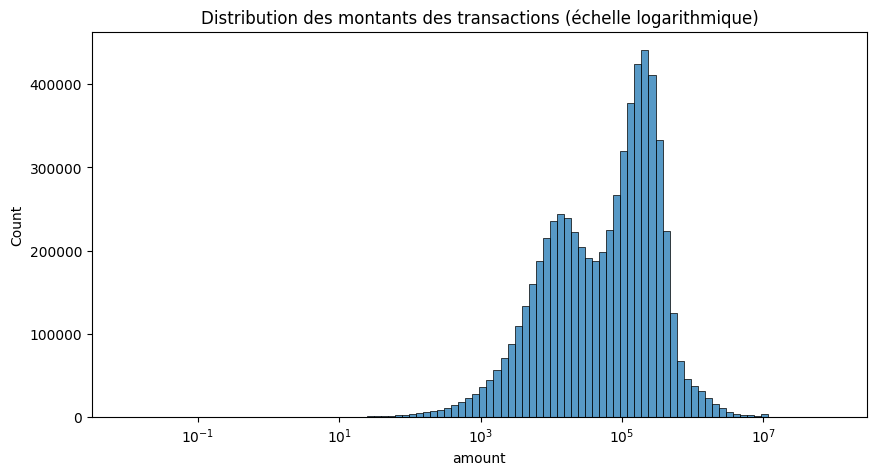

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(df['amount'], bins=100, log_scale=True, palette='inferno')
plt.title("Distribution des montants des transactions (échelle logarithmique)")
plt.show()

isFraud
0    6354407
1       8213
Name: count, dtype: int64


<Axes: title={'center': 'Répartition fraudes vs non fraudes'}, ylabel='count'>

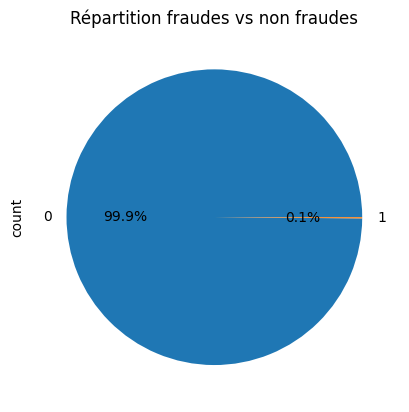

In [34]:
# Transactions frauduleuses

print(df['isFraud'].value_counts())
df['isFraud'].value_counts().plot.pie(autopct='%1.1f%%', title='Répartition fraudes vs non fraudes')


<Axes: xlabel='isFlaggedFraud'>

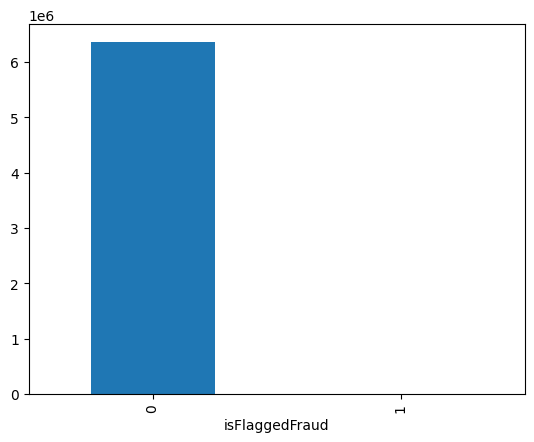

In [ ]:
# Repartition du flag
df['isFlaggedFraud'].value_counts().plot(kind='bar', title='')

#### Nous jugeons que la colonne isFlaggedFraud est inutile car toutes les transactions y sont flaguées non frauduleuses alors que certaines le sont bel et bien 

Nous remarquons qu'il y a les fraudes dans le type de transactions TRANSFER. Ceci est normal vu que les importeurs ont tendance à faire des virements ou transfert vers des comptes non traçables

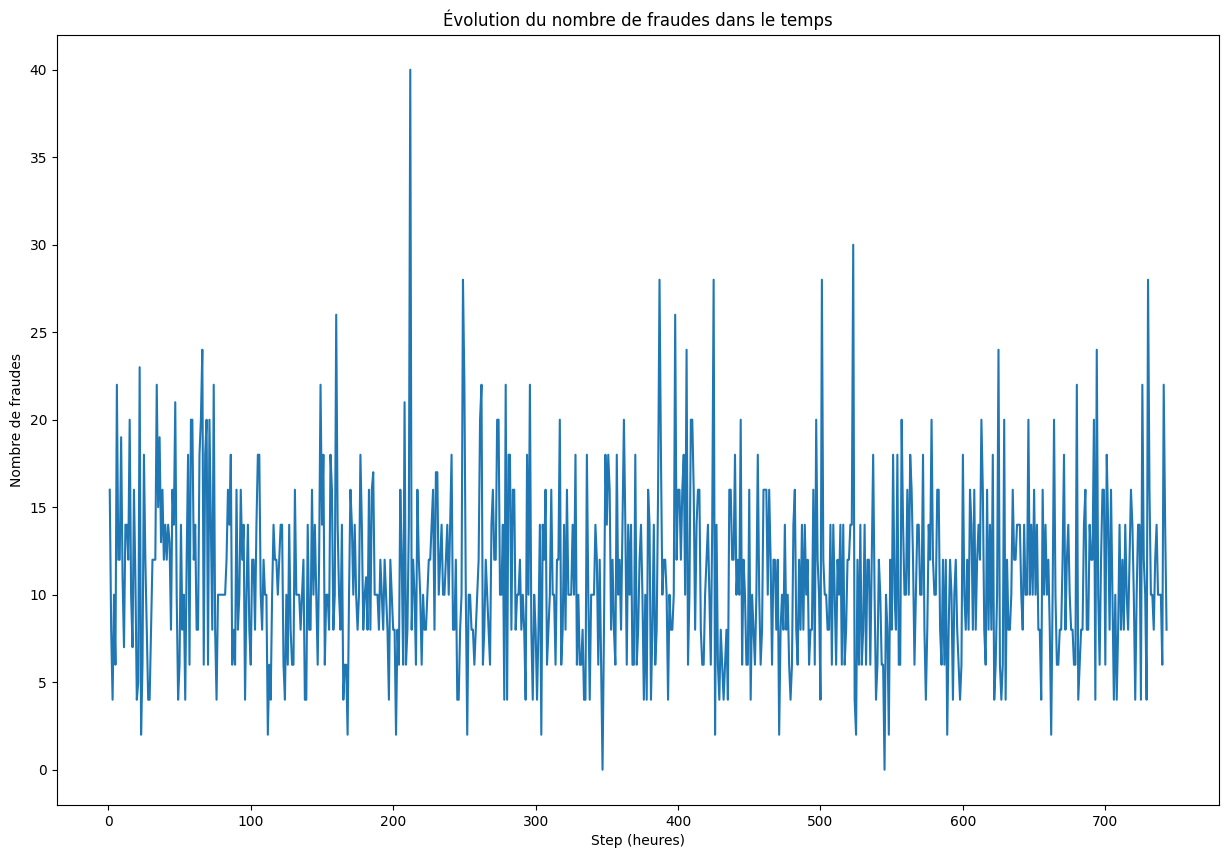

In [42]:
#La colonne Step représente le temps en heures
plt.figure(figsize=(15,10))
df.groupby('step')['isFraud'].sum().plot()
plt.title("Évolution du nombre de fraudes dans le temps")
plt.xlabel("Step (heures)")
plt.ylabel("Nombre de fraudes")
plt.show()
